# What Is Feature Engineering  (Outliers) ?

- Feature engineering is the process of creating or selecting relevant features from raw data to improve the performance and accuracy of machine learning models. It involves transforming the data into a format that is suitable for the model to learn from. Outliers, on the other hand, refer to data points that deviate significantly from the majority of the data.

- When dealing with outliers in feature engineering, the goal is to handle or mitigate their impact on the model's performance. Outliers can have a negative effect on the model's ability to generalize and make accurate predictions. Here are a few approaches to address outliers during feature engineering:

1. **Detection:** The first step is to identify outliers in the dataset. This can be done using statistical techniques such as the z-score, which measures how many standard deviations a data point is away from the mean. Other methods include the interquartile range (IQR) and visualization techniques like box plots.

2. **Removal:** In some cases, outliers can be removed from the dataset if they are determined to be erroneous or data entry errors. However, this should be done with caution, as removing valid outliers can result in loss of valuable information. Removing outliers should only be done after careful consideration and understanding of the data and the problem domain.

3. **Transformation:** Instead of removing outliers, they can be transformed or treated to minimize their impact. For example, one common transformation technique is Winsorization, where outliers are replaced with a predetermined value that is within a certain range. Another approach is log transformation, which can help reduce the impact of extreme values.

4. **Binning:** Binning involves dividing continuous features into bins or intervals and replacing the original values with bin labels or ordinal values. This can help mitigate the influence of outliers by grouping them with other values into a single bin.

5. Engineering new features: Outliers can sometimes contain valuable information or represent unique patterns in the data. In such cases, creating new features that capture the essence of outliers can be beneficial. For example, creating binary features to indicate the presence or absence of outliers or using clustering algorithms to assign outlier data points to specific groups.

- It's important to note that the approach to handling outliers during feature engineering may vary depending on the specific dataset, problem domain, and the goals of the analysis.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/11/outlier.png)

# IF YOUR DATA IS BAD, YOUR MACHINE LEARNING TOOLS WILL BE BAD


# In this exercise we will learn how to deal with outliers.

In [1]:
# import Required Libraries

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor # => Imported for multivariate outlier detection method.
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [2]:
# Adjusting Row Column Settings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

# Titanic Dataset

In [3]:
# Loading the Data Set

df_titanic = pd.read_csv('/kaggle/input/data-science-day1-titanic/DSB_Day1_Titanic_train.csv')

In [4]:
# Preliminary examination of the data set

def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df_titanic)

##################### Shape #####################
(891, 12)
##################### Types #####################
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
##################### Head #####################
   PassengerId  Survived  Pclass                                               Name     Sex    Age  SibSp  Parch            Ticket   Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male 22.000      1      0         A/5 21171  7.250   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1      0          PC 17599 71.283   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female 

In [5]:
# Analysis of Categorical Variables.

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] 

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 

    num_cols = [col for col in num_cols if col not in num_but_cat] 
    
    print(f"Observations: {dataframe.shape[0]}") # data frame in içerisindeki gözlem sayısına eriştik.
    print(f"Variables: {dataframe.shape[1]}") # data frame in içerisindeki değişken sayısına eriştik.
    print(f'cat_cols: {len(cat_cols)}') # kaçtane kategorik değişken olduğunu tespit ettik.
    print(f'num_cols: {len(num_cols)}') # kaç tane nümerik değişken olduğunu tespit ettik.
    print(f'cat_but_car: {len(cat_but_car)}') # kaç tane kardinal değişken olduğunu tespit ettik.
    print(f'num_but_cat: {len(num_but_cat)}') # kaç tane numerik gibi görünüp kategorik olan değişken olduğunu belirledi


    return cat_cols, num_cols, cat_but_car 

In [6]:
# Assigning the lists returned from the grap_col_names function to variables.

cat_cols, num_cols, cat_but_car = grab_col_names(df_titanic)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [7]:
# List of categorical variables

cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [8]:
# List of numerical variables

num_cols

['PassengerId', 'Age', 'Fare']

In [9]:
# 'PassengerId' The variable 'PassengerId' looks like a numerical variable, but it does not make sense to us. It is not a numeric variable.

In [10]:
num_cols = ["Age", "Fare"]

In [11]:
num_cols

['Age', 'Fare']

In [12]:
# List of variables that appear to be categorical but are cardinal

cat_but_car

['Name', 'Ticket', 'Cabin']

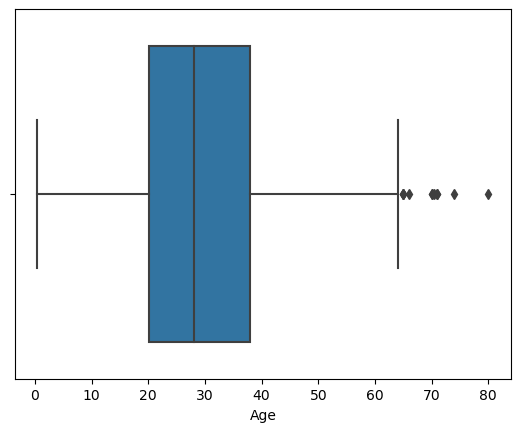

In [13]:
# Outliers with Graphical Technique

sns.boxplot(x=df_titanic["Age"])
plt.show(block=True)

# Capture Outliers

In [14]:
# First quarter value

q1 = df_titanic["Age"].quantile(0.25)

In [15]:
q1

20.125

In [16]:
# Second quarter value

q3 = df_titanic["Age"].quantile(0.75)

In [17]:
q3

38.0

In [18]:
# Calculation of iqr value

iqr = q3 - q1 

In [19]:
iqr

17.875

In [20]:
# Calculation of upper limit

up = q3 + 1.5 * iqr

In [21]:
up

64.8125

In [22]:
# Calculation of lower limit

low = q1 - 1.5 * iqr

In [23]:
low

-6.6875

In [24]:
# Selection of values less than the lower limit or greater than the upper limit in the age variable from the df_titanic.

df_titanic[(df_titanic["Age"] < low) | (df_titanic["Age"] > up)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.000,0,0,13509,26.550,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.000,0,0,PC 17609,49.504,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000,0,0,27042,30.000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.000,0,0,C.A. 24580,10.500,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.000,1,1,WE/P 5735,71.000,B22,S


In [25]:
# Access to the index information of the outliers we detected.

df_titanic[(df_titanic["Age"] < low) | (df_titanic["Age"] > up)].index

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

# Is There an Outlier or Not? Outlier Checking

In [26]:
# Are there any outliers in the data set?

df_titanic[(df_titanic["Age"] < low) | (df_titanic["Age"] > up)].any(axis=None)

True

In [27]:
# We selected the first 20 observations from the non-outliers.

df_titanic[~(df_titanic["Age"] < low) | (df_titanic["Age"] > up)].head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000,0,0,17463,51.862,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000,0,2,347742,11.133,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000,1,0,237736,30.071,NaN,C


In [28]:
# We selected outliers that were below the lower limit.

df_titanic[(df_titanic["Age"] < low)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [29]:
# We checked whether there is an outlier below the lower limit as True False.

df_titanic[(df_titanic["Age"] < low)].any(axis=None)

False

**The steps we have done so far:**

1. We set a threshold value.
2. We accessed outliers.
3. We quickly checked for outliers.

# Making These Steps We Have Done Above Into A Function.

In [30]:
# Loading the Data Set

df_titanic = pd.read_csv('/kaggle/input/data-science-day1-titanic/DSB_Day1_Titanic_train.csv')

In [31]:
# Threshold determination function for outliers

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75): 
    quartile1 = dataframe[col_name].quantile(q1) 
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [32]:
# Determination of threshold value for Age variable

outlier_thresholds(df_titanic, "Age")

(-6.6875, 64.8125)

In [33]:
# Determination of threshold value for Fare variable

outlier_thresholds(df_titanic, "Fare")

(-26.724, 65.6344)

In [34]:
# values from the outlier_thresholds function Assignment as lower and upper limit values.

# low, up = outlier_thresholds(df_titanic, "Age")

In [35]:
# values from the outlier_thresholds function Assignment as lower and upper limit values.

low, up = outlier_thresholds(df_titanic, "Fare")

In [36]:
# We selected outliers for the mouse variable.

df_titanic[(df_titanic["Fare"] < low) | (df_titanic["Fare"] > up)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000,3,2,19950,263.000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.521,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000,1,0,PC 17604,82.171,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000,1,0,PC 17572,76.729,D33,C


In [37]:
# We accessed the index information of the outliers for the mouse variable.

df_titanic[(df_titanic["Fare"] < low) | (df_titanic["Fare"] > up)].index

Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879], dtype='int64', length=116)

In [38]:
# Functionalization of the above operations.

def check_outlier(dataframe, col_name): 
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [39]:
# Check for outliers in the Age variable.

check_outlier(df_titanic, "Age")

True

In [40]:
# Check for outliers in the Fare variable.

check_outlier(df_titanic, "Fare")

True

In [41]:
# We check whether there is an outlier in the relevant variable in the data set. If there is an outlier, we access the index information of the observations.

def grab_outliers(dataframe, col_name, index=False): 
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head()) 
    else: 
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))]) 

    if index: 
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index 
        return outlier_index 

In [42]:
for col in num_cols:
    grab_outliers(df_titanic, col, index=True)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q
    PassengerId  Survived  Pclass                                               Name     Sex    Age  SibSp  Parch    Ticket    Fare        Cabin Embarked
1             2         1       1  Cumings, Mrs. John Bradley (Florence Briggs

In [43]:
grab_outliers(df_titanic, "Age", index=True)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [44]:
grab_outliers(df_titanic, "Fare", index=True)

    PassengerId  Survived  Pclass                                               Name     Sex    Age  SibSp  Parch    Ticket    Fare        Cabin Embarked
1             2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1      0  PC 17599  71.283          C85        C
27           28         0       1                     Fortune, Mr. Charles Alexander    male 19.000      3      2     19950 263.000  C23 C25 C27        S
31           32         1       1     Spencer, Mrs. William Augustus (Marie Eugenie)  female    NaN      1      0  PC 17569 146.521          B78        C
34           35         0       1                            Meyer, Mr. Edgar Joseph    male 28.000      1      0  PC 17604  82.171          NaN        C
52           53         1       1           Harper, Mrs. Henry Sleeper (Myna Haxtun)  female 49.000      1      0  PC 17572  76.729          D33        C


Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879], dtype='int64', length=116)

In [45]:
def boxplot_outliers(dataframe, col_name):
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=dataframe[col_name])
    plt.show(block=True)

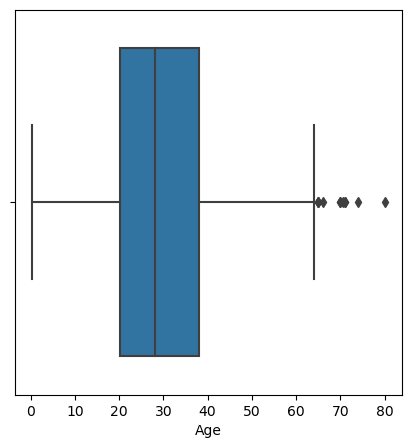

In [46]:
boxplot_outliers(df_titanic, "Age")

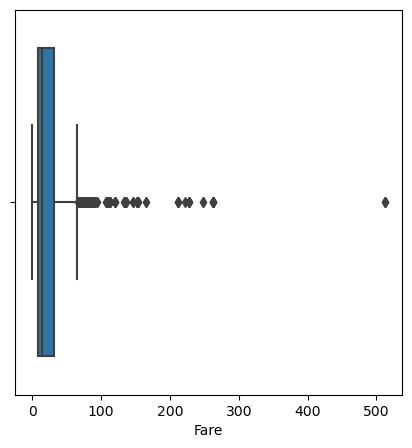

In [47]:
boxplot_outliers(df_titanic, "Fare")

- **In the above operations, we determined the threshold values for outlier detection and checked whether there are outliers for each of the numeric variables according to these thresholds.**

- **So what kind of actions will we take for these outliers we have detected?**

In [48]:
# Removing outliers from the data set.

def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [49]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


In [50]:
for col in num_cols:
    df_titanic = remove_outlier(df_titanic, col)

In [51]:
for col in num_cols:
    is_outlier = check_outlier(df_titanic, col)
    print(is_outlier)

True
True


In [52]:
# Re-assignment with thresholds

def replace_with_thresholds(dataframe, variable): 
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [53]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [54]:
for col in num_cols: 
    replace_with_thresholds(df_titanic, col)

In [55]:
for col in num_cols:
    is_outlier = check_outlier(df_titanic, col)
    print(f"There are {'outliers' if is_outlier else 'no outliers'} in column {col}.")

There are no outliers in column Age.
There are no outliers in column Fare.


# Application_Train Dataset

In [56]:
# Loading the Data Set

df_application_train = pd.read_csv('/kaggle/input/application-train/application_train.csv')

In [57]:
# Preliminary examination of the data set

def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df_application_train)

##################### Shape #####################
(307511, 122)
##################### Types #####################
SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_M

In [58]:
# Examination of the types of variables in the data set.

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] 

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 

    num_cols = [col for col in num_cols if col not in num_but_cat] 
    
    print(f"Observations: {dataframe.shape[0]}") # data frame in içerisindeki gözlem sayısına eriştik.
    print(f"Variables: {dataframe.shape[1]}") # data frame in içerisindeki değişken sayısına eriştik.
    print(f'cat_cols: {len(cat_cols)}') # kaçtane kategorik değişken olduğunu tespit ettik.
    print(f'num_cols: {len(num_cols)}') # kaç tane nümerik değişken olduğunu tespit ettik.
    print(f'cat_but_car: {len(cat_but_car)}') # kaç tane kardinal değişken olduğunu tespit ettik.
    print(f'num_but_cat: {len(num_but_cat)}') # kaç tane numerik gibi görünüp kategorik olan değişken olduğunu belirledi


    return cat_cols, num_cols, cat_but_car 

In [59]:
# Assigning the lists returned from the grap_col_names function to variables.

cat_cols, num_cols, cat_but_car = grab_col_names(df_application_train)

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


In [60]:
# List of categorical variables

cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'TARGET',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOC

In [61]:
# List of numerical variables

num_cols

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI'

In [62]:
# "SK_ID_CURR" The variable '"SK_ID_CURR" looks like a numerical variable, but it does not make sense to us. It is not a numeric variable.

num_cols = [col for col in num_cols if col not in "SK_ID_CURR"]

In [63]:
num_cols

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD

In [64]:
# List of variables that appear to be categorical but are cardinal

cat_but_car

['ORGANIZATION_TYPE']

In [65]:
# Threshold determination function for outliers

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75): 
    quartile1 = dataframe[col_name].quantile(q1) 
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [66]:
def boxplot_outliers(dataframe, col_name):
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=dataframe[col_name])
    plt.show(block=True)

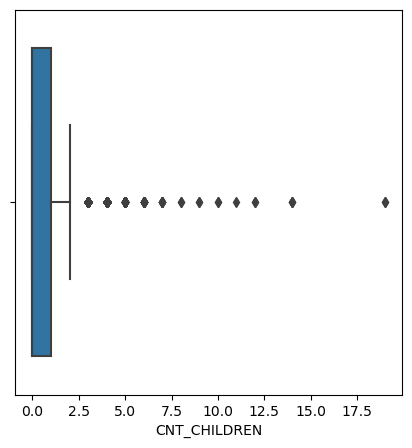

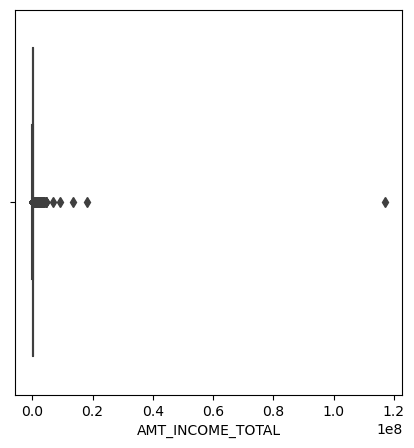

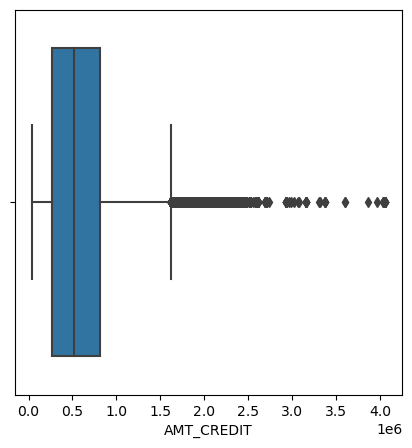

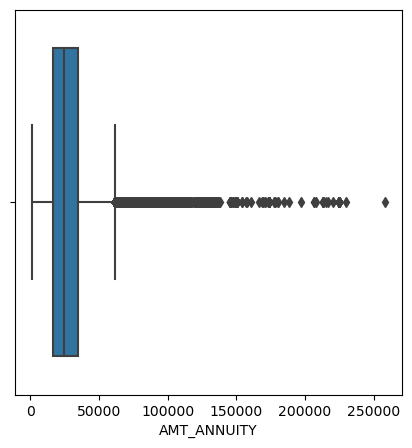

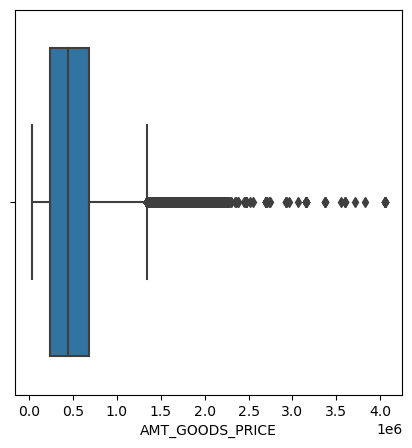

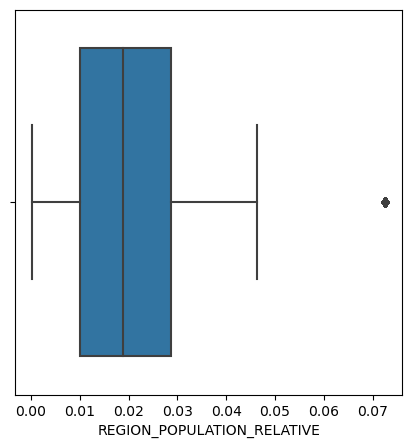

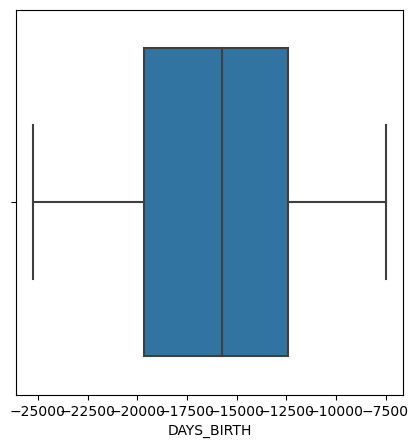

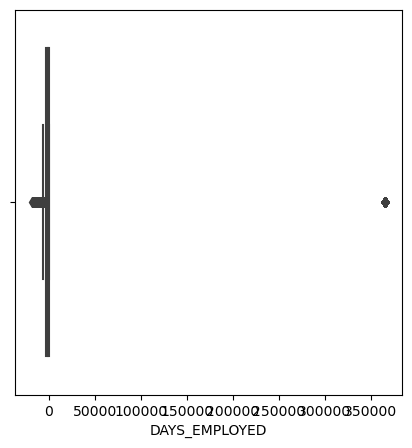

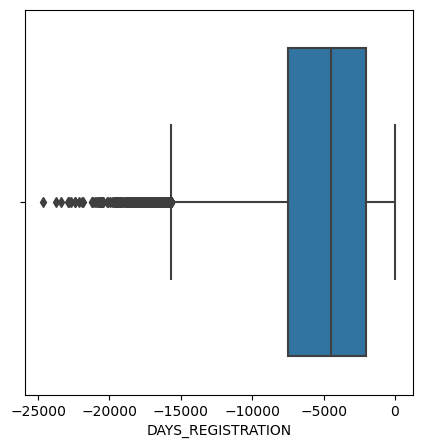

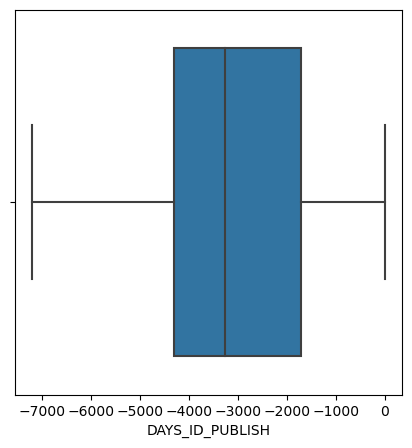

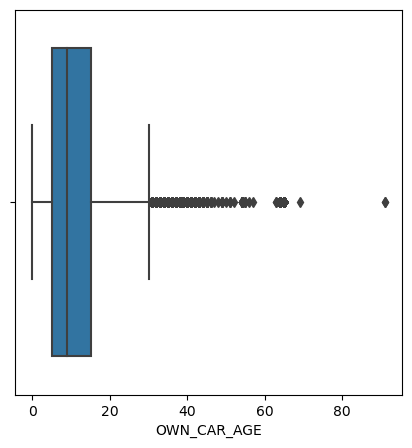

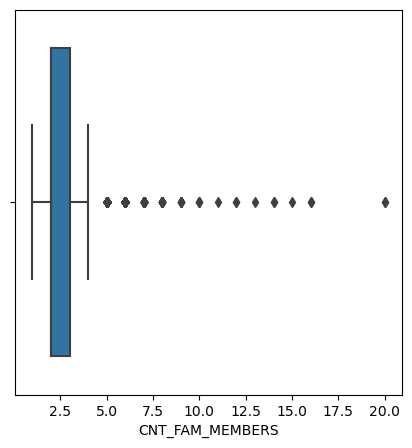

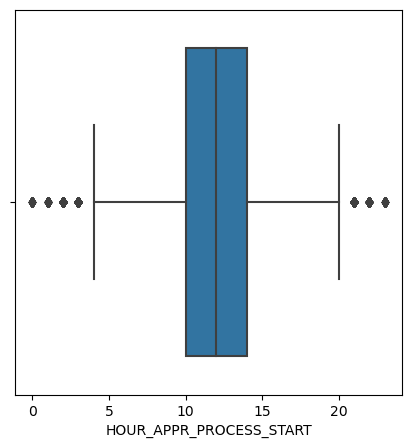

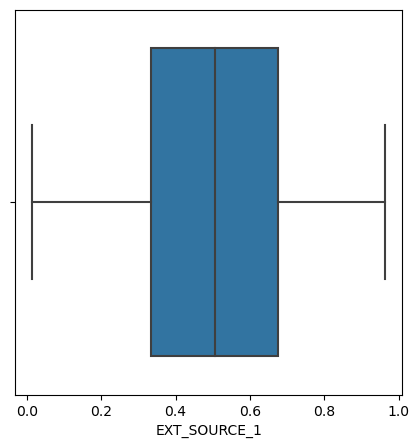

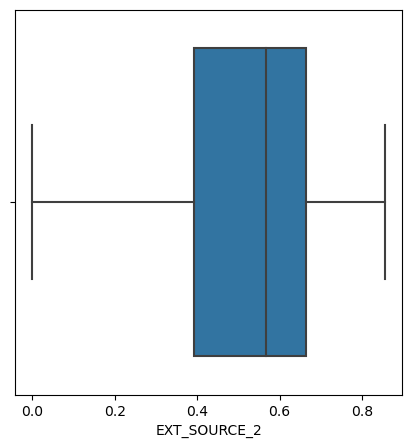

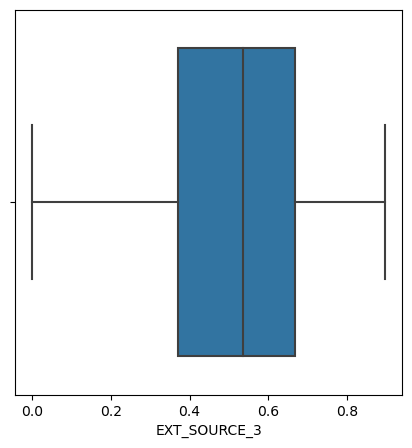

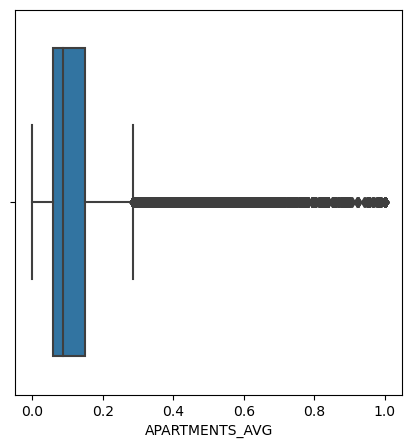

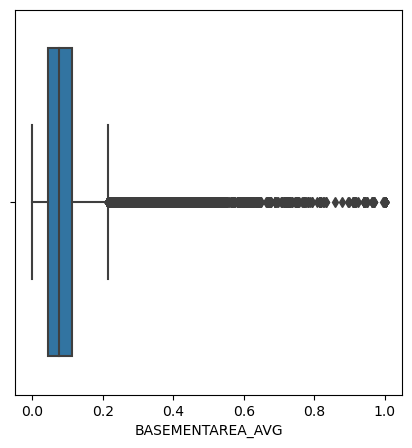

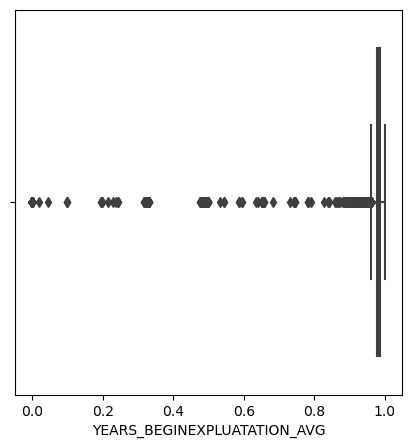

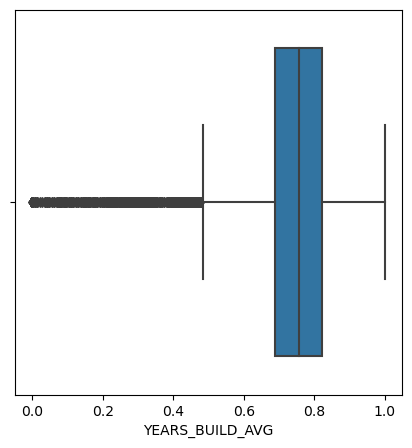

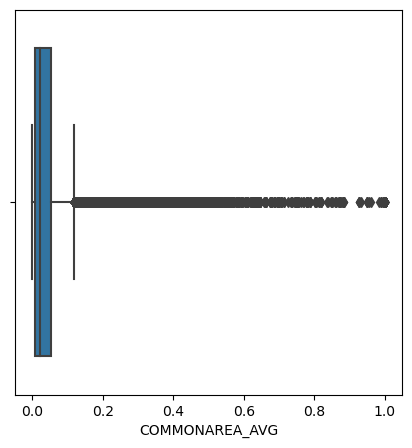

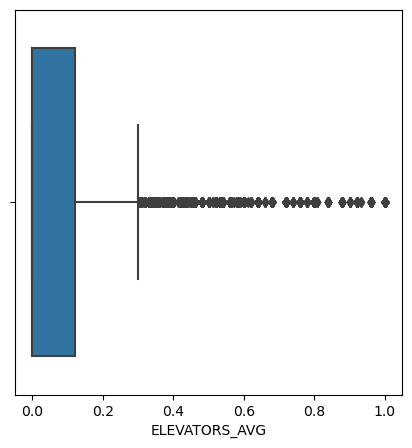

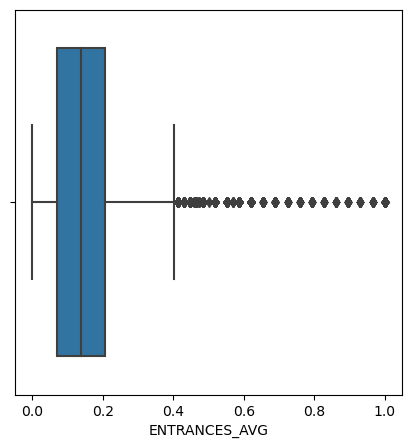

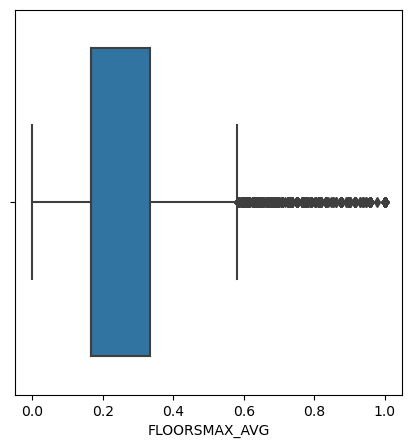

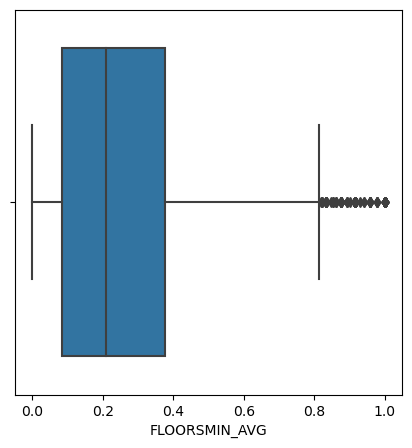

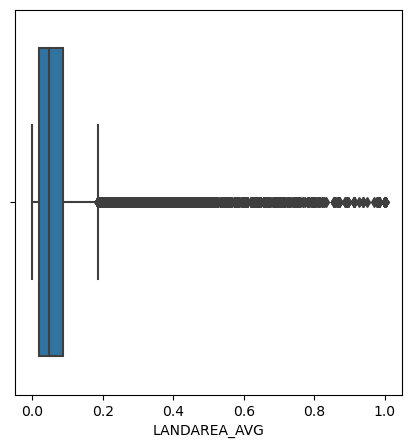

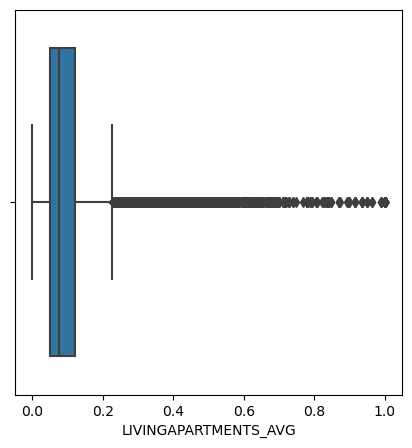

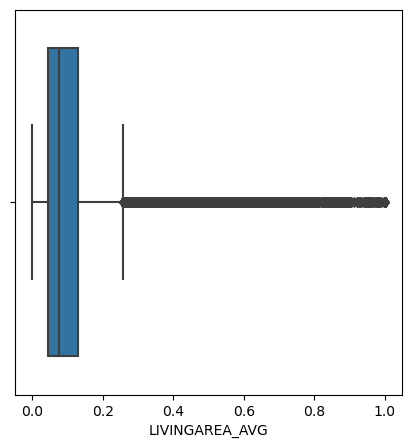

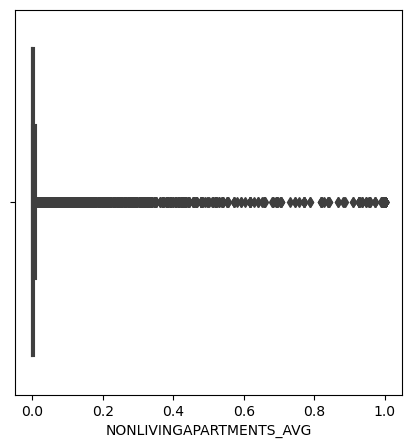

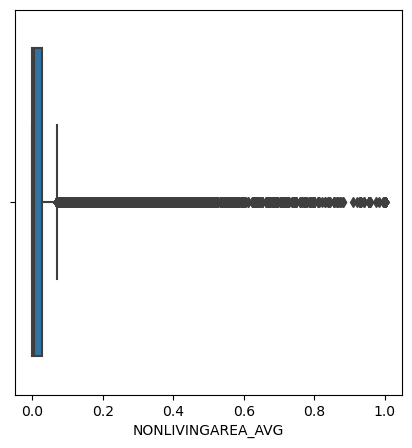

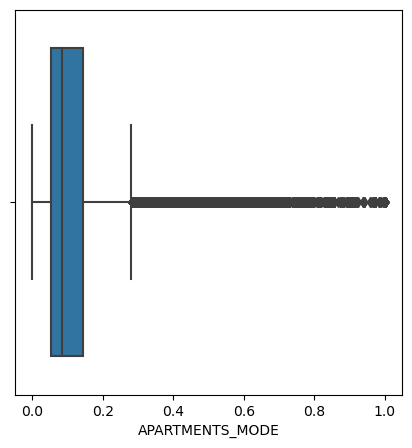

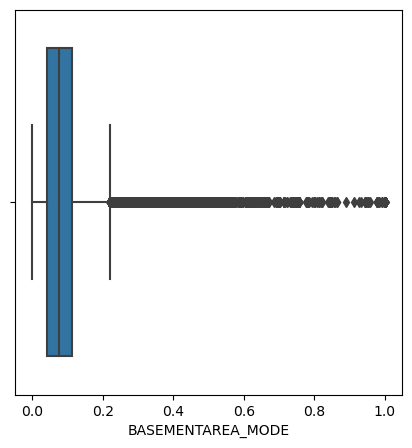

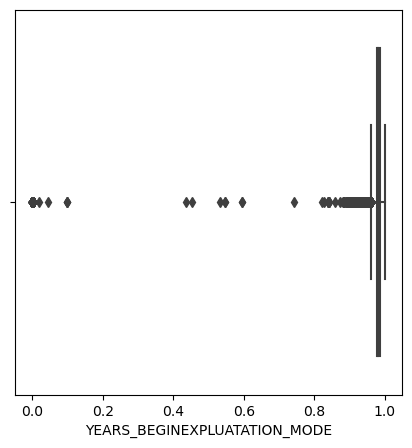

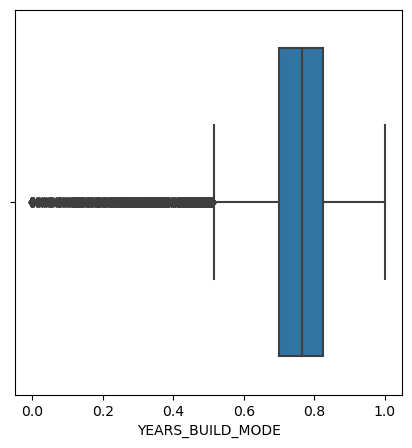

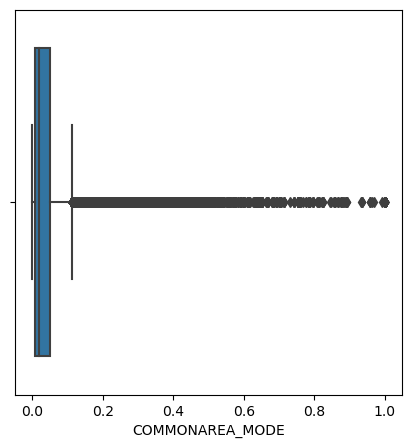

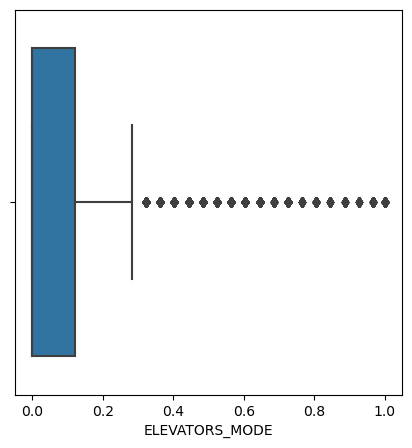

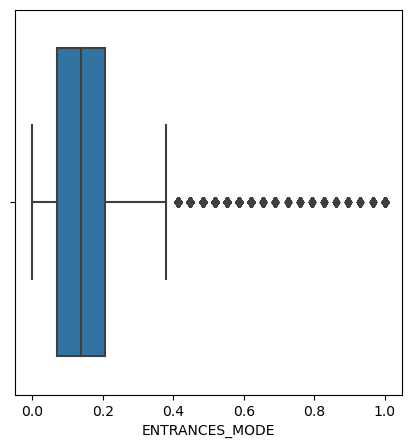

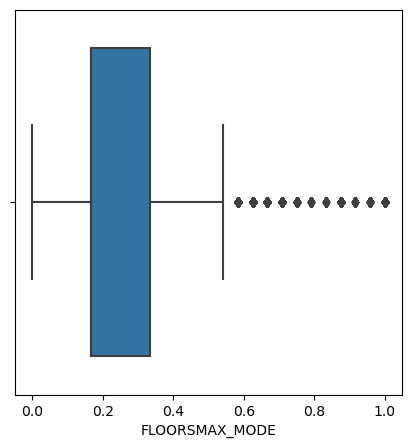

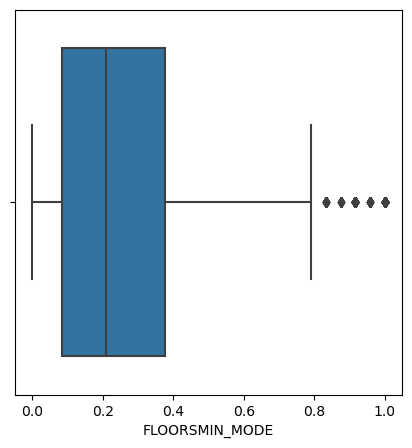

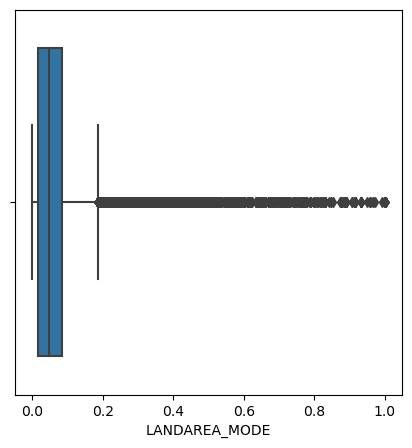

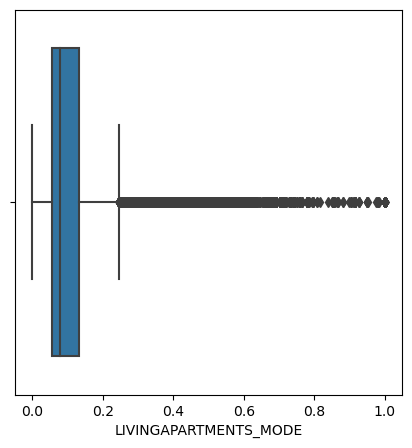

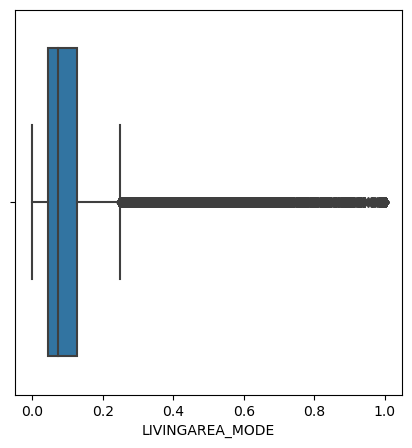

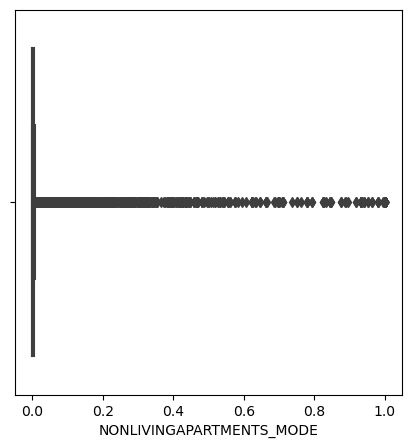

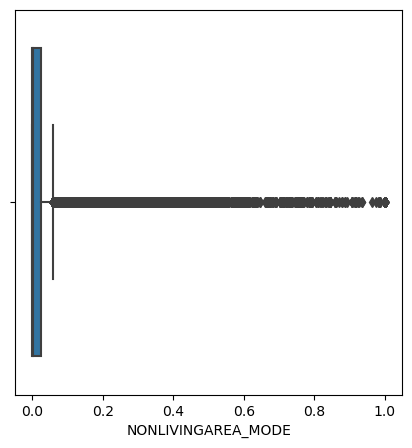

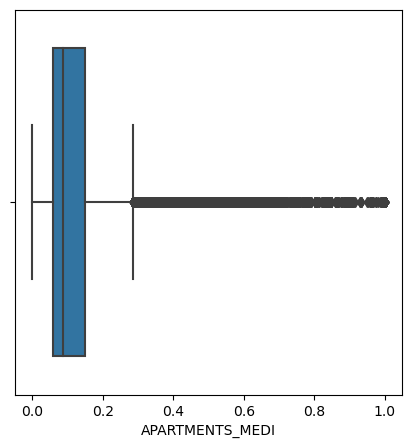

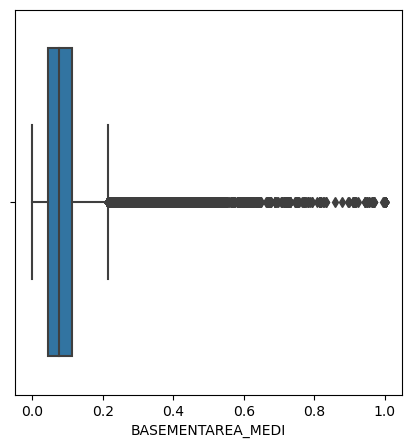

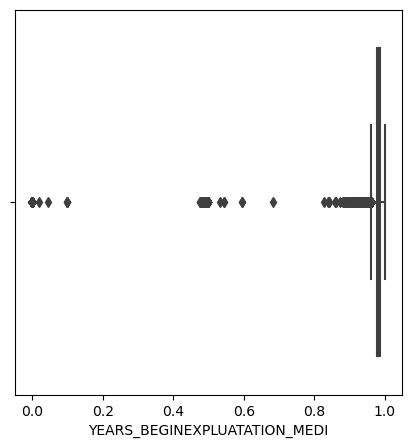

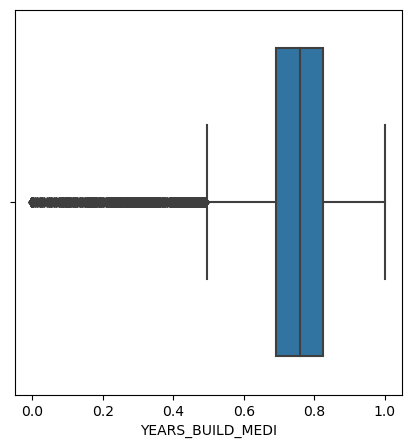

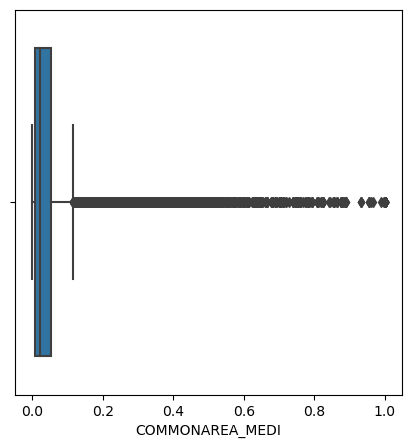

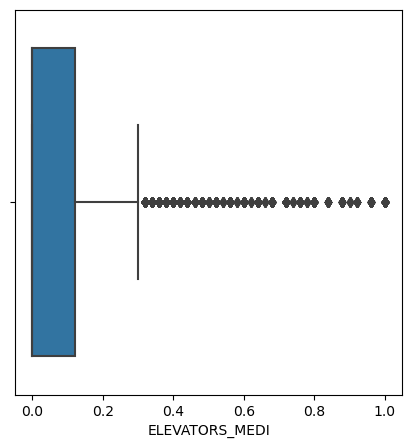

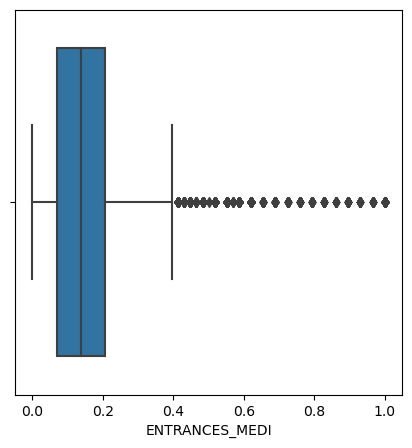

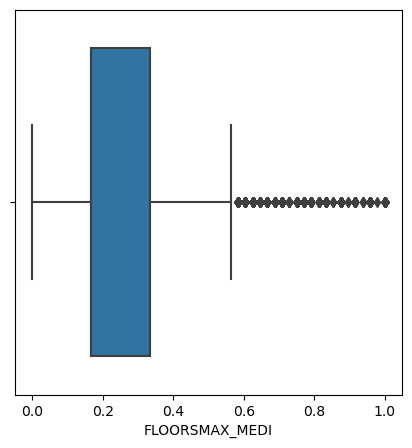

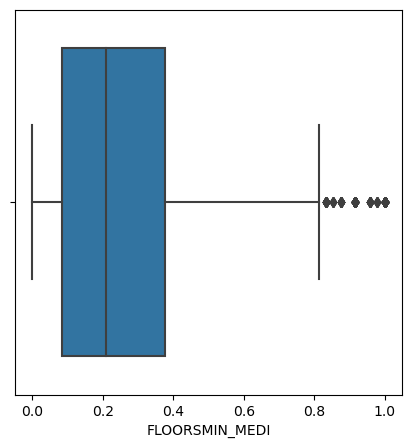

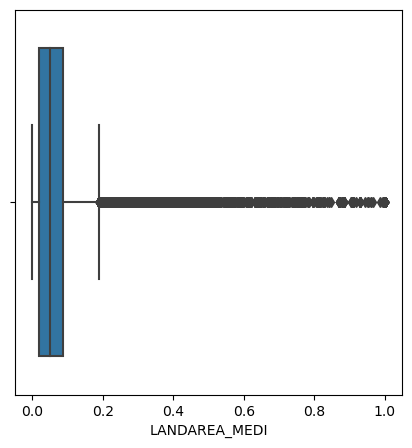

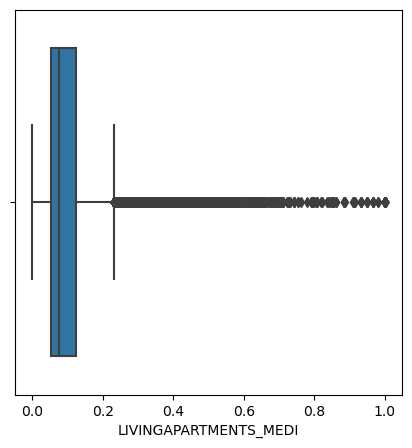

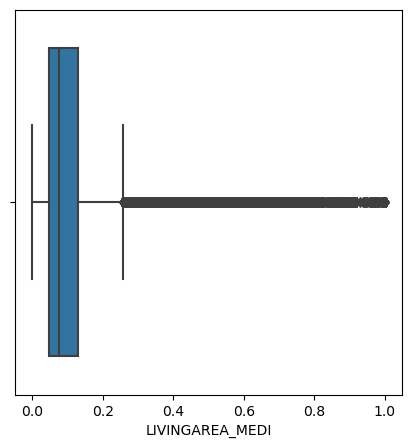

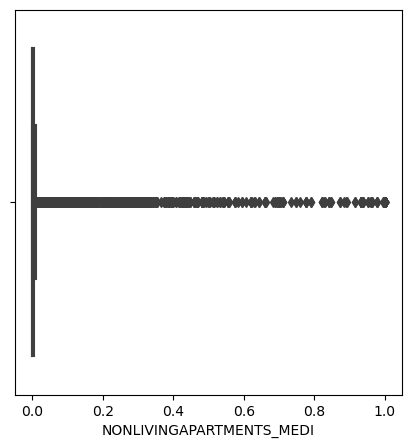

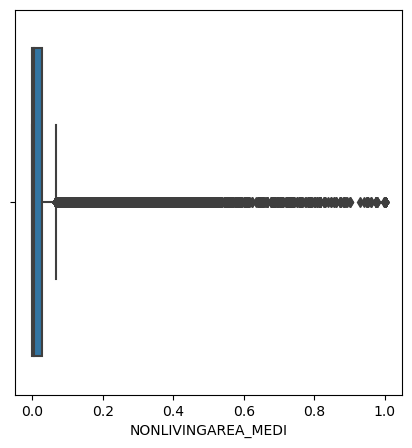

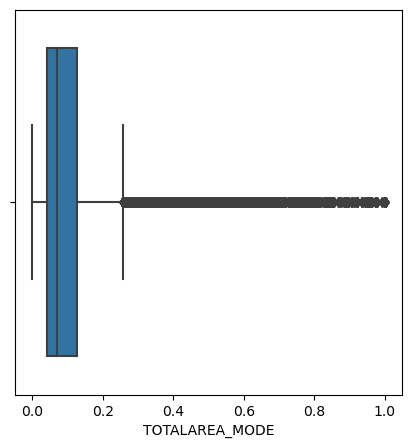

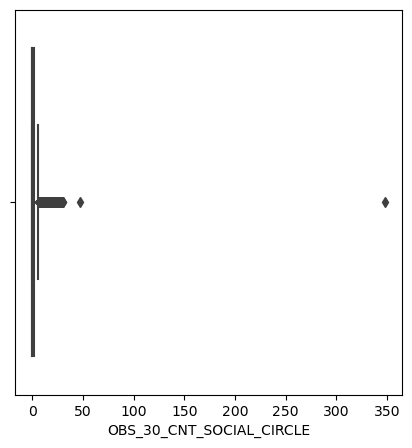

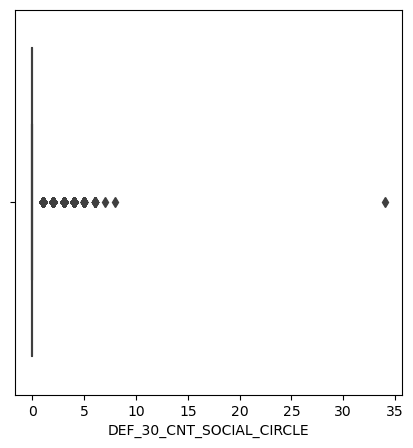

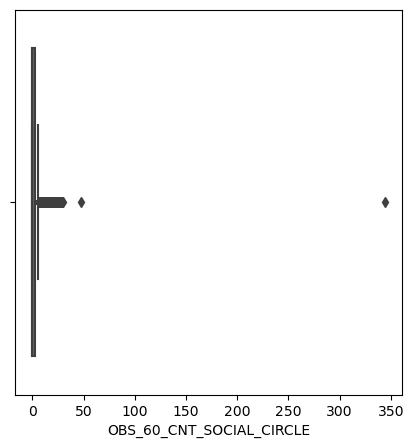

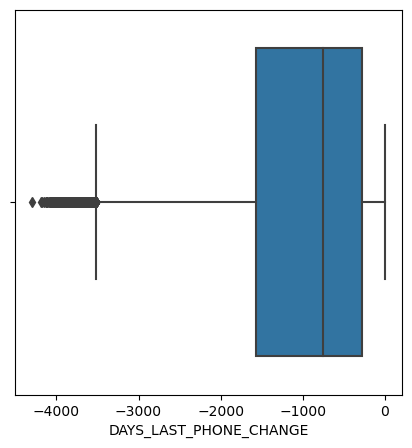

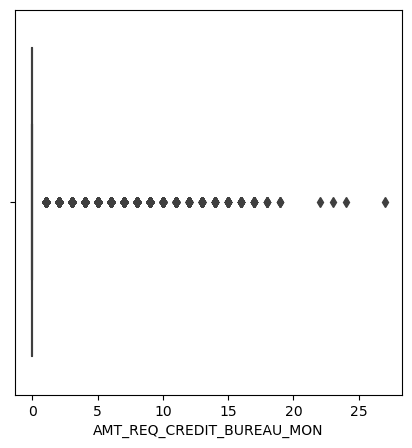

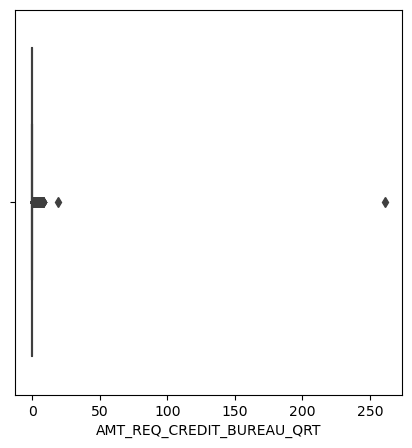

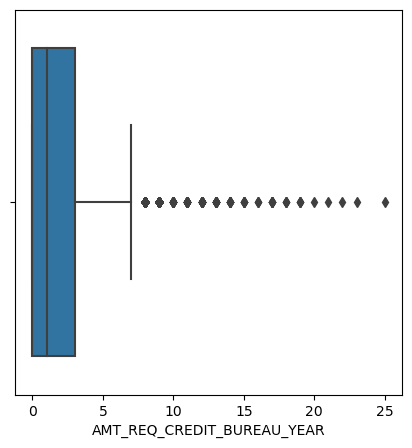

In [67]:
for col in num_cols:
    boxplot_outliers(df_application_train, col)

In [68]:
# Checking outliers.

def check_outlier(dataframe, col_name): 
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [69]:
for col in num_cols: 
    print(col, check_outlier(df_application_train, col))

CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE True
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE True
NONLIVINGAPARTMENTS_MODE True
NONLIVINGAREA_MODE True
APARTMENTS_MEDI True
BASEMENTAREA_MEDI 

In [70]:
for col in num_cols: 
    replace_with_thresholds(df_application_train, col)

In [71]:
for col in num_cols: 
    print(col, check_outlier(df_application_train, col))

CNT_CHILDREN False
AMT_INCOME_TOTAL False
AMT_CREDIT False
AMT_ANNUITY False
AMT_GOODS_PRICE False
REGION_POPULATION_RELATIVE False
DAYS_BIRTH False
DAYS_EMPLOYED False
DAYS_REGISTRATION False
DAYS_ID_PUBLISH False
OWN_CAR_AGE False
CNT_FAM_MEMBERS False
HOUR_APPR_PROCESS_START False
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG False
BASEMENTAREA_AVG False
YEARS_BEGINEXPLUATATION_AVG False
YEARS_BUILD_AVG False
COMMONAREA_AVG False
ELEVATORS_AVG False
ENTRANCES_AVG False
FLOORSMAX_AVG False
FLOORSMIN_AVG False
LANDAREA_AVG False
LIVINGAPARTMENTS_AVG False
LIVINGAREA_AVG False
NONLIVINGAPARTMENTS_AVG False
NONLIVINGAREA_AVG False
APARTMENTS_MODE False
BASEMENTAREA_MODE False
YEARS_BEGINEXPLUATATION_MODE False
YEARS_BUILD_MODE False
COMMONAREA_MODE False
ELEVATORS_MODE False
ENTRANCES_MODE False
FLOORSMAX_MODE False
FLOORSMIN_MODE False
LANDAREA_MODE False
LIVINGAPARTMENTS_MODE False
LIVINGAREA_MODE False
NONLIVINGAPARTMENTS_MODE False
NONLIVINGAREA_MODE False
